# "การปรับแต่งโมเดล Polynomial Regression และ Radial Basis Function ด้วย GridSearchCV บนชุดข้อมูลหลายๆ ตัวอย่าง"

In [6]:
pip install --upgrade scikit-learn numpy

   ---------------------------------------- 9.3/9.3 MB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 302.2/302.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import numpy as np

# ระบุชื่อไฟล์ .csv ของชุดข้อมูล ทั้งหมด
file_paths = ['dataset-a.csv', 'dataset-b.csv', 'dataset-c.csv', 'dataset-d.csv']

for file_path in file_paths:
    # โหลดข้อมูลจากไฟล์ .csv
    data = pd.read_csv(file_path)

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    X = data[['x']].values
    y = data['y'].values

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    x_tv, x_test, y_tv, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
    x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size=1/3, random_state=1)

    # สร้าง pipeline ประมวลผลที่รวม PolynomialFeatures และ LinearRegression
    poly_reg = PolynomialFeatures()
    poly_model = LinearRegression()
    poly_pipeline = Pipeline([("polynomial_features", poly_reg), ("linear_regression", poly_model)])

    # กำหนดช่วงของ p ที่ต้องการทดสอบ
    param_grid_poly = {'polynomial_features__degree': list(range(1, 11))}

    # ใช้ GridSearchCV เพื่อค้นหาค่า p ที่เหมาะสม
    grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_poly.fit(x_train, y_train)

    # แสดงค่า p ที่ดีที่สุด
    print(f"Best p for Polynomial in {file_path}:", grid_search_poly.best_params_['polynomial_features__degree'])

    # กำหนดช่วงของ alpha และ gamma ที่ต้องการทดสอบ
    param_grid_radial = {'alpha': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}

    # สร้างโมเดล LBF ราเดียล
    radial_model = KernelRidge(kernel='rbf')

    # ใช้ GridSearchCV เพื่อค้นหาค่า alpha และ gamma ที่เหมาะสม
    grid_search_radial = GridSearchCV(radial_model, param_grid_radial, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_radial.fit(x_train, y_train)

    # แสดงค่า alpha และ gamma ที่ดีที่สุด
    print(f"Best alpha for Radial in {file_path}:", grid_search_radial.best_params_['alpha'])
    print(f"Best gamma for Radial in {file_path}:", grid_search_radial.best_params_['gamma'])

    # สร้างโมเดล LBF โพลนอมิอล ด้วยค่า p ที่ดีที่สุด
    best_p_poly = grid_search_poly.best_params_['polynomial_features__degree']
    poly_reg = PolynomialFeatures(degree=best_p_poly)
    poly_X_train = poly_reg.fit_transform(x_train)
    poly_X_val = poly_reg.transform(x_vali)
    poly_model = LinearRegression()
    poly_model.fit(poly_X_train, y_train)
    
    # สร้างโมเดล LBF ราเดียล ด้วยค่า alpha และ gamma ที่ดีที่สุด
    best_alpha_radial = grid_search_radial.best_params_['alpha']
    best_gamma_radial = grid_search_radial.best_params_['gamma']
    radial_model = KernelRidge(kernel='rbf', alpha=best_alpha_radial, gamma=best_gamma_radial)
    radial_model.fit(x_train, y_train)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_radial = radial_model.predict(x_vali)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_radial = mean_squared_error(y_vali, y_val_pred_radial)
    print(f"Validation MSE for Radial Model in {file_path}:", mse_val_radial)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_poly = poly_model.predict(poly_X_val)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_poly = mean_squared_error(y_vali, y_val_pred_poly)
    print(f"Validation MSE for Polynomial Model in {file_path}:", mse_val_poly)


Best p for Polynomial in dataset-a.csv: 1
Best alpha for Radial in dataset-a.csv: 1000.0
Best gamma for Radial in dataset-a.csv: 0.001
Validation MSE for Radial Model in dataset-a.csv: 1.0512604413315876
Validation MSE for Polynomial Model in dataset-a.csv: 0.11399859419252725
Best p for Polynomial in dataset-b.csv: 2
Best alpha for Radial in dataset-b.csv: 1000.0
Best gamma for Radial in dataset-b.csv: 0.001
Validation MSE for Radial Model in dataset-b.csv: 1.026925680920072
Validation MSE for Polynomial Model in dataset-b.csv: 0.4542401805459258
Best p for Polynomial in dataset-c.csv: 1
Best alpha for Radial in dataset-c.csv: 1000.0
Best gamma for Radial in dataset-c.csv: 0.001
Validation MSE for Radial Model in dataset-c.csv: 0.9954271103940205
Validation MSE for Polynomial Model in dataset-c.csv: 0.6881725686149779
Best p for Polynomial in dataset-d.csv: 1
Best alpha for Radial in dataset-d.csv: 1000.0
Best gamma for Radial in dataset-d.csv: 0.001
Validation MSE for Radial Model in

# พล็อตการทดสอบโมเดลทางสถิติบนชุดข้อมูลทั้งหมด"

Best p for Polynomial in dataset-a.csv: 1
Best alpha for Radial in dataset-a.csv: 1000.0
Best gamma for Radial in dataset-a.csv: 0.001
Validation MSE for Radial Model in dataset-a.csv: 1.0512604413315876
Validation MSE for Polynomial Model in dataset-a.csv: 0.11399859419252725


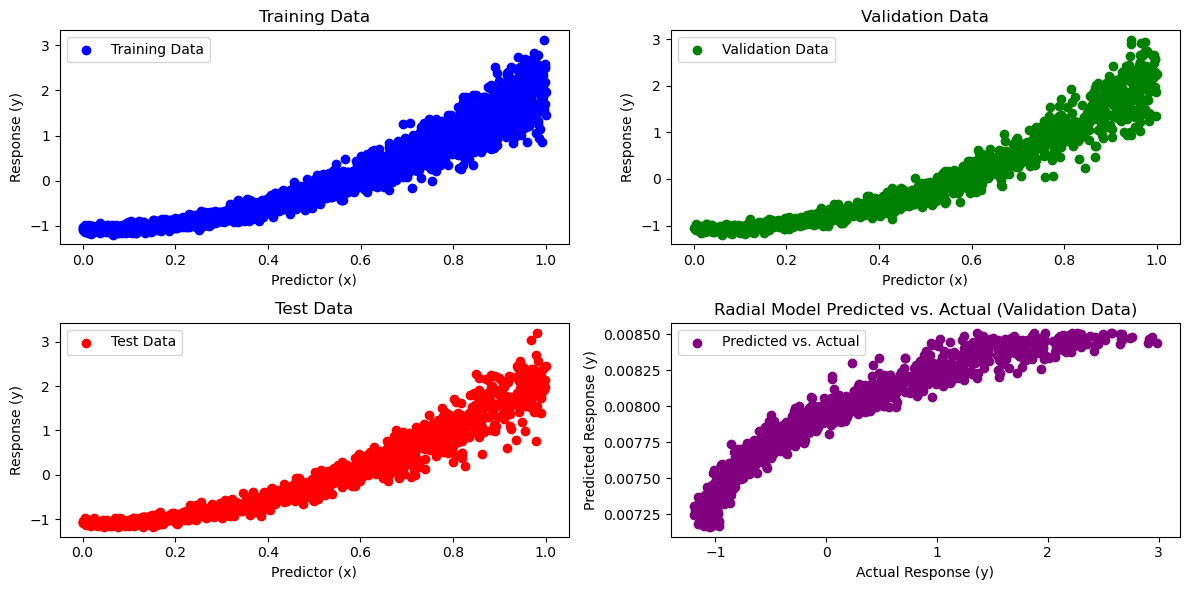

Best p for Polynomial in dataset-b.csv: 2
Best alpha for Radial in dataset-b.csv: 1000.0
Best gamma for Radial in dataset-b.csv: 0.001
Validation MSE for Radial Model in dataset-b.csv: 1.026925680920072
Validation MSE for Polynomial Model in dataset-b.csv: 0.4542401805459258


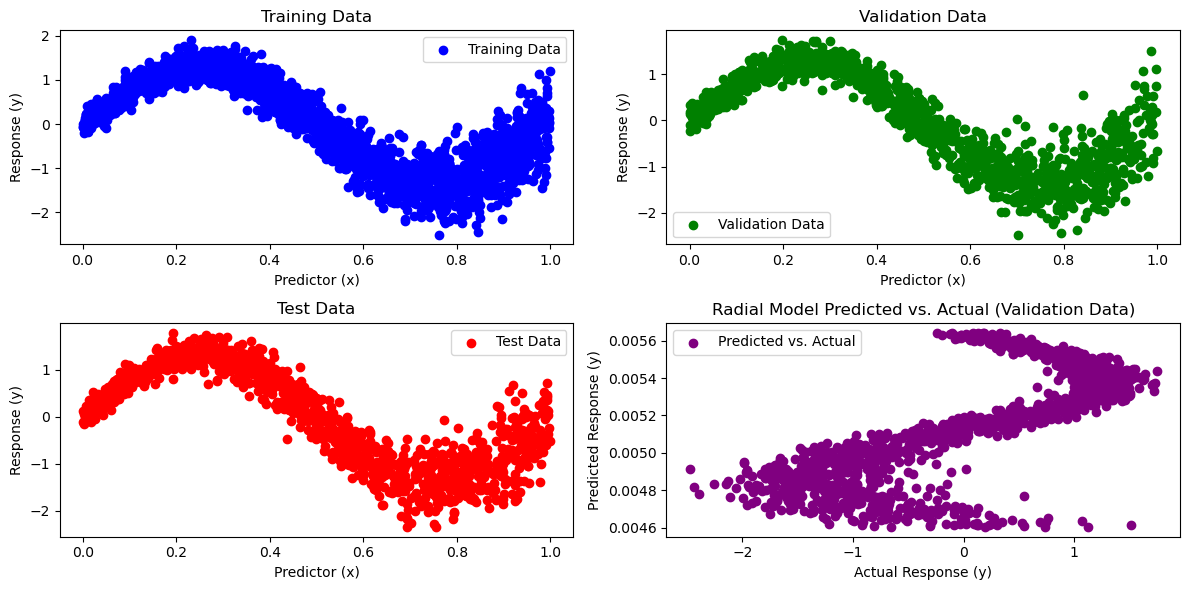

Best p for Polynomial in dataset-c.csv: 1
Best alpha for Radial in dataset-c.csv: 1000.0
Best gamma for Radial in dataset-c.csv: 0.001
Validation MSE for Radial Model in dataset-c.csv: 0.9954271103940205
Validation MSE for Polynomial Model in dataset-c.csv: 0.6881725686149779


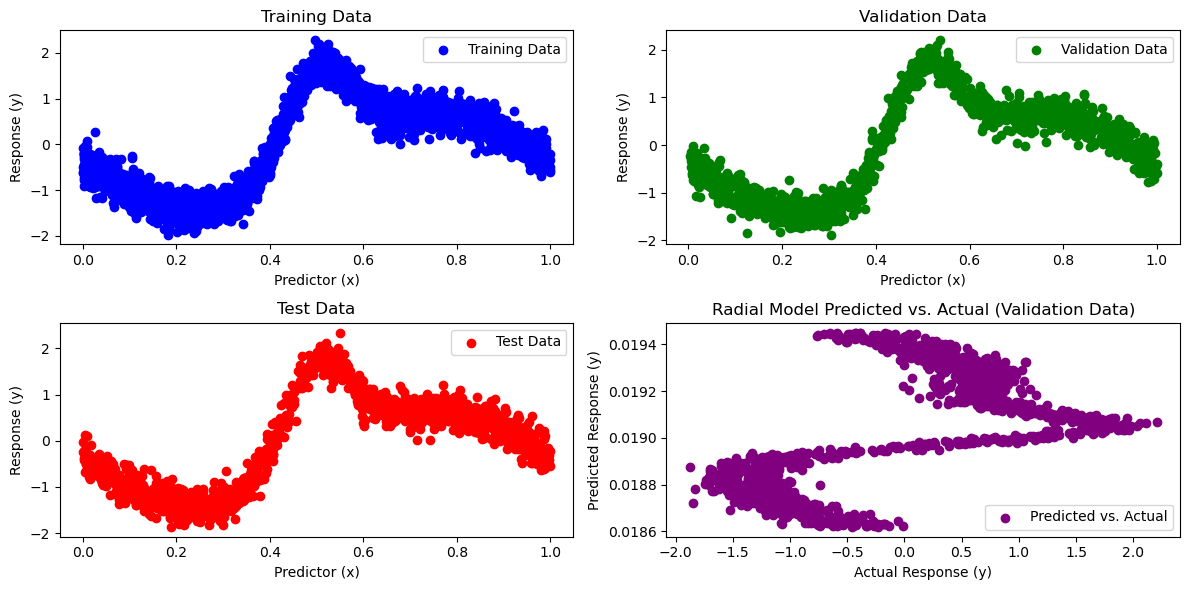

Best p for Polynomial in dataset-d.csv: 1
Best alpha for Radial in dataset-d.csv: 1000.0
Best gamma for Radial in dataset-d.csv: 0.001
Validation MSE for Radial Model in dataset-d.csv: 0.9936729428753129
Validation MSE for Polynomial Model in dataset-d.csv: 0.265396150907754


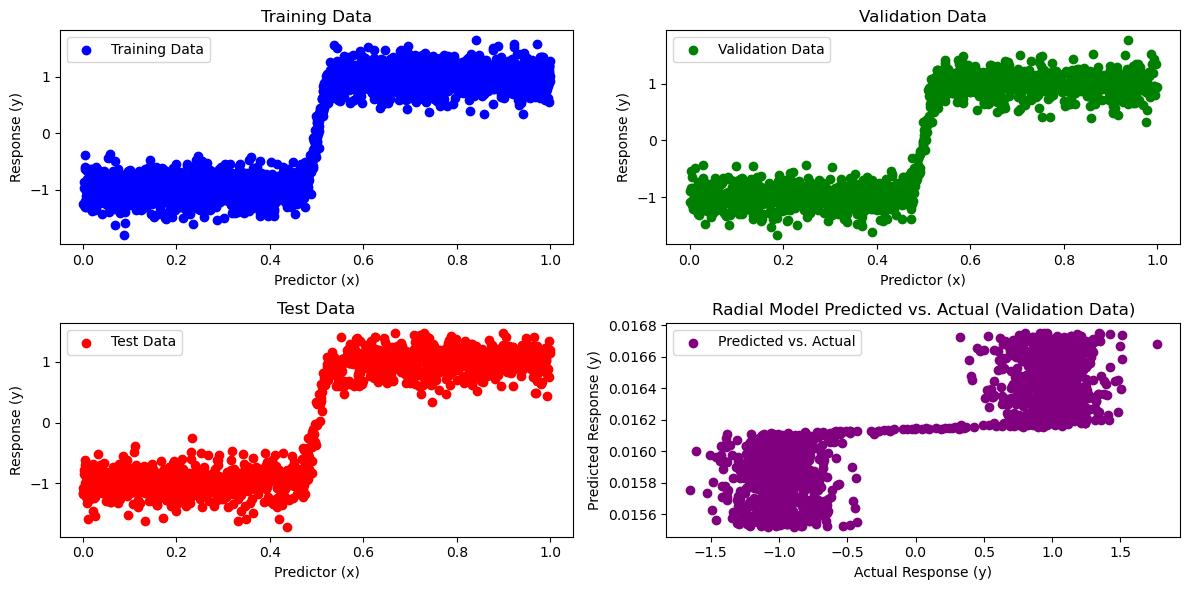

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt

# ระบุชื่อไฟล์ .csv ของชุดข้อมูล 
file_paths = ['dataset-a.csv', 'dataset-b.csv', 'dataset-c.csv', 'dataset-d.csv']

for file_path in file_paths:
    # โหลดข้อมูลจากไฟล์ .csv
    data = pd.read_csv(file_path)

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    X = data[['x']].values
    y = data['y'].values

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    x_tv, x_test, y_tv, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
    x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size=1/3, random_state=1)

    # สร้างท่อการประมวลผลที่รวม PolynomialFeatures และ LinearRegression
    poly_reg = PolynomialFeatures()
    poly_model = LinearRegression()
    poly_pipeline = Pipeline([("polynomial_features", poly_reg), ("linear_regression", poly_model)])

    # กำหนดช่วงของ p ที่ต้องการทดสอบ
    param_grid_poly = {'polynomial_features__degree': list(range(1, 11))}

    # ใช้ GridSearchCV เพื่อค้นหาค่า p ที่เหมาะสม
    grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_poly.fit(x_train, y_train)
    # แสดงค่า p ที่ดีที่สุด
    print(f"Best p for Polynomial in {file_path}:", grid_search_poly.best_params_['polynomial_features__degree'])

    # กำหนดช่วงของ alpha และ gamma ที่ต้องการทดสอบ
    param_grid_radial = {'alpha': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}

    # สร้างโมเดล LBF ราเดียล
    radial_model = KernelRidge(kernel='rbf')

    # ใช้ GridSearchCV เพื่อค้นหาค่า alpha และ gamma ที่เหมาะสม
    grid_search_radial = GridSearchCV(radial_model, param_grid_radial, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_radial.fit(x_train, y_train)

    # แสดงค่า alpha และ gamma ที่ดีที่สุด
    print(f"Best alpha for Radial in {file_path}:", grid_search_radial.best_params_['alpha'])
    print(f"Best gamma for Radial in {file_path}:", grid_search_radial.best_params_['gamma'])

    # สร้างโมเดล LBF โพลนอมิอล ด้วยค่า p ที่ดีที่สุด
    best_p_poly = grid_search_poly.best_params_['polynomial_features__degree']
    poly_reg = PolynomialFeatures(degree=best_p_poly)
    poly_X_train = poly_reg.fit_transform(x_train)
    poly_X_val = poly_reg.transform(x_vali)
    poly_model = LinearRegression()
    poly_model.fit(poly_X_train, y_train)
    
    # สร้างโมเดล LBF ราเดียล ด้วยค่า alpha และ gamma ที่ดีที่สุด
    best_alpha_radial = grid_search_radial.best_params_['alpha']
    best_gamma_radial = grid_search_radial.best_params_['gamma']
    radial_model = KernelRidge(kernel='rbf', alpha=best_alpha_radial, gamma=best_gamma_radial)
    radial_model.fit(x_train, y_train)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_radial = radial_model.predict(x_vali)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_radial = mean_squared_error(y_vali, y_val_pred_radial)
    print(f"Validation MSE for Radial Model in {file_path}:", mse_val_radial)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_poly = poly_model.predict(poly_X_val)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_poly = mean_squared_error(y_vali, y_val_pred_poly)
    print(f"Validation MSE for Polynomial Model in {file_path}:", mse_val_poly)

    # พล็อตกราฟการกระจายตัวของข้อมูล
    plt.figure(figsize=(12, 6))
    
    # กราฟ 1: Scatter Plot of Training Data
    plt.subplot(2, 2, 1)
    plt.scatter(x_train, y_train, label='Training Data', color='blue')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Training Data')
    
    # กราฟ 2: Scatter Plot of Validation Data
    plt.subplot(2, 2, 2)
    plt.scatter(x_vali, y_vali, label='Validation Data', color='green')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Validation Data')

    # กราฟ 3: Scatter Plot of Test Data
    plt.subplot(2, 2, 3)
    plt.scatter(x_test, y_test, label='Test Data', color='red')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Test Data')
    
    # กราฟ 4: Scatter Plot of Predicted vs. Actual for Radial Model
    plt.subplot(2, 2, 4)
    plt.scatter(y_vali, y_val_pred_radial, label='Predicted vs. Actual', color='purple')
    plt.xlabel('Actual Response (y)')
    plt.ylabel('Predicted Response (y)')
    plt.legend()
    plt.title('Radial Model Predicted vs. Actual (Validation Data)')

    plt.tight_layout()
    plt.show()


# แสดงกราฟข้อมูลและค่า MSE

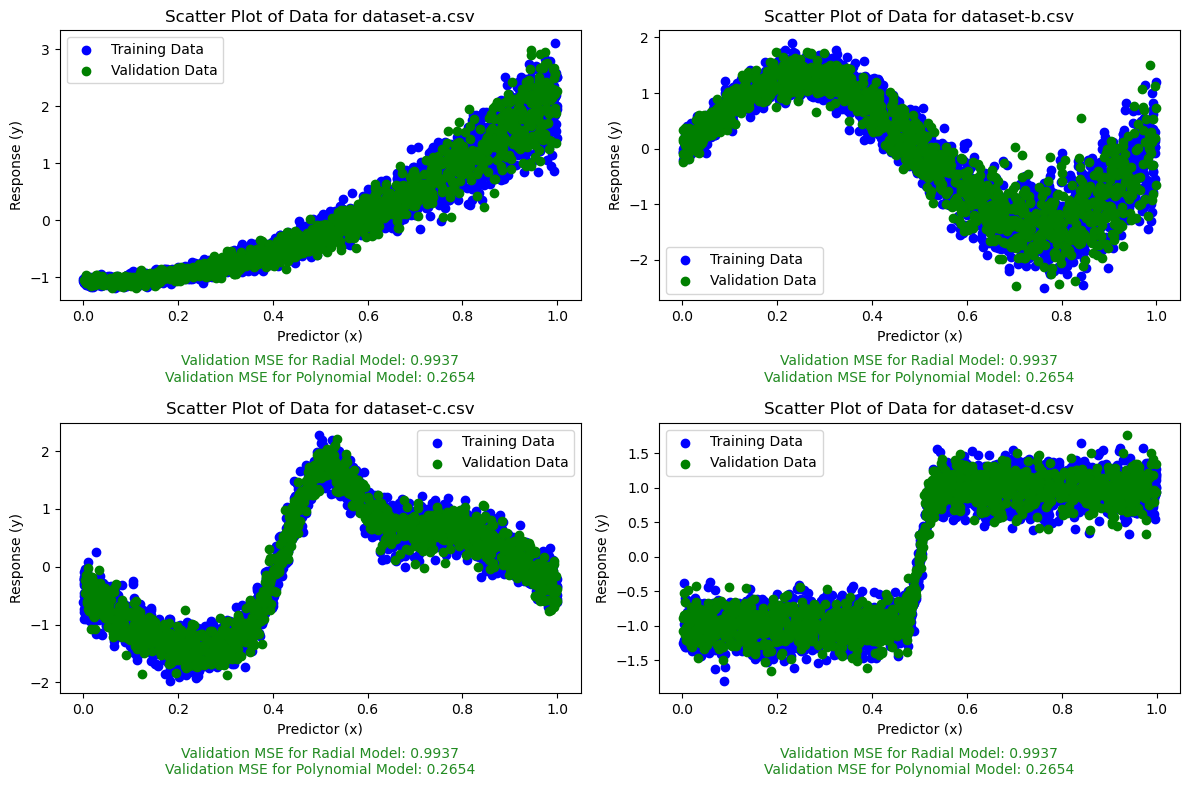

In [8]:
import matplotlib.pyplot as plt

# ระบุชื่อไฟล์ .csv ของชุดข้อมูล
file_paths = ['dataset-a.csv', 'dataset-b.csv', 'dataset-c.csv', 'dataset-d.csv']

# กำหนดแต่ละ subplot
plt.figure(figsize=(12, 8))  # กำหนดขนาดของรูปภาพทั้งหมด
for i, file_path in enumerate(file_paths):
    data = pd.read_csv(file_path)
    X = data[['x']].values
    y = data['y'].values

    x_tv, x_test, y_tv, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
    x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size=1/3, random_state=1)

    plt.subplot(2, 2, i + 1)  # กำหนด subplot ตามลำดับ
    plt.scatter(x_train, y_train, label='Training Data', color='blue')
    plt.scatter(x_vali, y_vali, label='Validation Data', color='green')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title(f'Scatter Plot of Data for {file_path}')
    # ปรับตำแหน่งของข้อความ
    text_x = 0.5
    text_y = -0.3  # ปรับตำแหน่งให้อยู่ใต้กราฟ  
    plt.text(text_x, text_y, f"Validation MSE for Radial Model: {mse_val_radial:.4f}\nValidation MSE for Polynomial Model: {mse_val_poly:.4f}", transform=plt.gca().transAxes, fontsize=10, ha='center', color='ForestGreen')



plt.tight_layout() 
plt.show()

กราฟการกระจายตัวนี้ช่วยในการวิเคราะห์ความกระจายและความแปรปรวนในข้อมูล และช่วยในการแสดงความแตกต่างระหว่าง Train และ Test ซึ่งสำคัญในการปรับแต่งและการวิเคราะห์ผลของโมเดลที่ถูกสร้างขึ้น.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import numpy as np

# ระบุชื่อไฟล์ .csv ของชุดข้อมูล ทั้งหมด
file_paths = ['dataset-a.csv', 'dataset-b.csv', 'dataset-c.csv', 'dataset-d.csv']

for file_path in file_paths:
    # โหลดข้อมูลจากไฟล์ .csv
    data = pd.read_csv(file_path)

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    X = data[['x']].values
    y = data['y'].values

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    x_tv, x_test, y_tv, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
    x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size=1/3, random_state=1)

    # สร้าง pipeline ประมวลผลที่รวม PolynomialFeatures และ LinearRegression
    poly_reg = PolynomialFeatures()
    poly_model = LinearRegression()
    poly_pipeline = Pipeline([("polynomial_features", poly_reg), ("linear_regression", poly_model)])

    # กำหนดช่วงของ p ที่ต้องการทดสอบ
    param_grid_poly = {'polynomial_features__degree': list(range(1, 11))}

    # ใช้ GridSearchCV เพื่อค้นหาค่า p ที่เหมาะสม
    grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_poly.fit(x_train, y_train)

    # แสดงค่า p ที่ดีที่สุด
    print(f"Best p for Polynomial in {file_path}:", grid_search_poly.best_params_['polynomial_features__degree'])

    # กำหนดช่วงของ alpha และ gamma ที่ต้องการทดสอบ
    param_grid_radial = {'alpha': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}

    # สร้างโมเดล LBF ราเดียล
    radial_model = KernelRidge(kernel='rbf')

    # ใช้ GridSearchCV เพื่อค้นหาค่า alpha และ gamma ที่เหมาะสม
    grid_search_radial = GridSearchCV(radial_model, param_grid_radial, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_radial.fit(x_train, y_train)

    # แสดงค่า alpha และ gamma ที่ดีที่สุด
    print(f"Best alpha for Radial in {file_path}:", grid_search_radial.best_params_['alpha'])
    print(f"Best gamma for Radial in {file_path}:", grid_search_radial.best_params_['gamma'])

    # สร้างโมเดล LBF โพลนอมิอล ด้วยค่า p ที่ดีที่สุด
    best_p_poly = grid_search_poly.best_params_['polynomial_features__degree']
    poly_reg = PolynomialFeatures(degree=best_p_poly)
    poly_X_train = poly_reg.fit_transform(x_train)
    poly_X_val = poly_reg.transform(x_vali)
    poly_model = LinearRegression()
    poly_model.fit(poly_X_train, y_train)
    
    # สร้างโมเดล LBF ราเดียล ด้วยค่า alpha และ gamma ที่ดีที่สุด
    best_alpha_radial = grid_search_radial.best_params_['alpha']
    best_gamma_radial = grid_search_radial.best_params_['gamma']
    radial_model = KernelRidge(kernel='rbf', alpha=best_alpha_radial, gamma=best_gamma_radial)
    radial_model.fit(x_train, y_train)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_radial = radial_model.predict(x_vali)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_radial = mean_squared_error(y_vali, y_val_pred_radial)
    print(f"Validation MSE for Radial Model in {file_path}:", mse_val_radial)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_poly = poly_model.predict(poly_X_val)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_poly = mean_squared_error(y_vali, y_val_pred_poly)
    print(f"Validation MSE for Polynomial Model in {file_path}:", mse_val_poly)


Best p for Polynomial in dataset-a.csv: 1
Best alpha for Radial in dataset-a.csv: 1000.0
Best gamma for Radial in dataset-a.csv: 0.001
Validation MSE for Radial Model in dataset-a.csv: 1.0512604413315876
Validation MSE for Polynomial Model in dataset-a.csv: 0.11399859419252725
Best p for Polynomial in dataset-b.csv: 2
Best alpha for Radial in dataset-b.csv: 1000.0
Best gamma for Radial in dataset-b.csv: 0.001
Validation MSE for Radial Model in dataset-b.csv: 1.026925680920072
Validation MSE for Polynomial Model in dataset-b.csv: 0.45424018054592563
Best p for Polynomial in dataset-c.csv: 1
Best alpha for Radial in dataset-c.csv: 1000.0
Best gamma for Radial in dataset-c.csv: 0.001
Validation MSE for Radial Model in dataset-c.csv: 0.9954271103940205
Validation MSE for Polynomial Model in dataset-c.csv: 0.6881725686149779
Best p for Polynomial in dataset-d.csv: 1
Best alpha for Radial in dataset-d.csv: 1000.0
Best gamma for Radial in dataset-d.csv: 0.001
Validation MSE for Radial Model i

Best p for Polynomial in dataset-a.csv: 1
Best alpha for Radial in dataset-a.csv: 1000.0
Best gamma for Radial in dataset-a.csv: 0.001
Validation MSE for Radial Model in dataset-a.csv: 1.0512604413315876
Validation MSE for Polynomial Model in dataset-a.csv: 0.11399859419252725


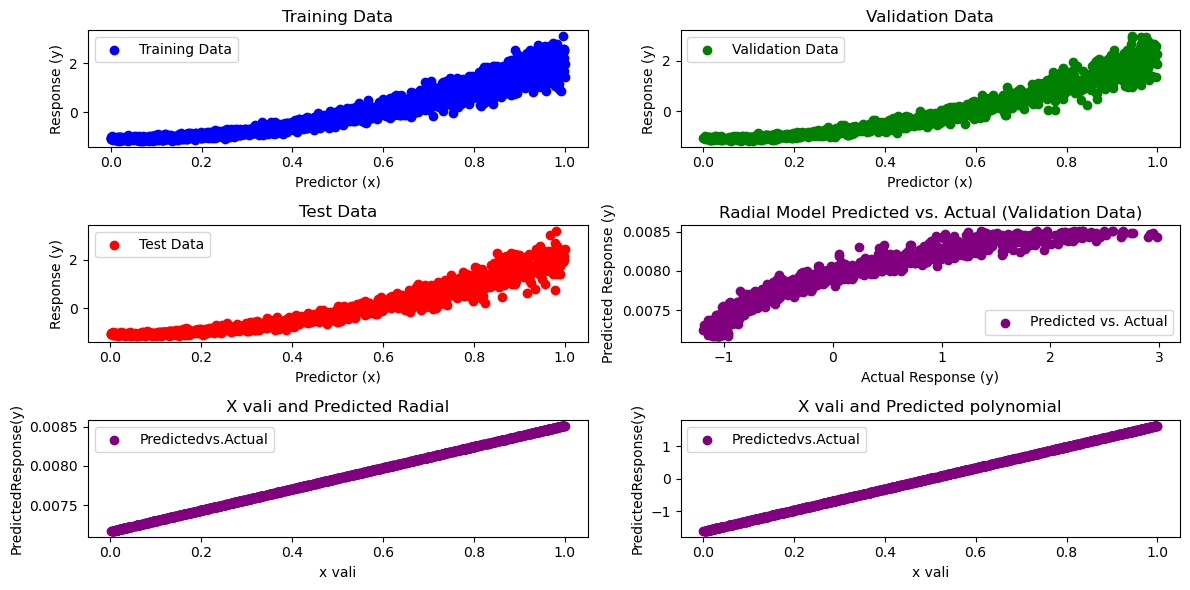

Best p for Polynomial in dataset-b.csv: 2
Best alpha for Radial in dataset-b.csv: 1000.0
Best gamma for Radial in dataset-b.csv: 0.001
Validation MSE for Radial Model in dataset-b.csv: 1.026925680920072
Validation MSE for Polynomial Model in dataset-b.csv: 0.45424018054592563


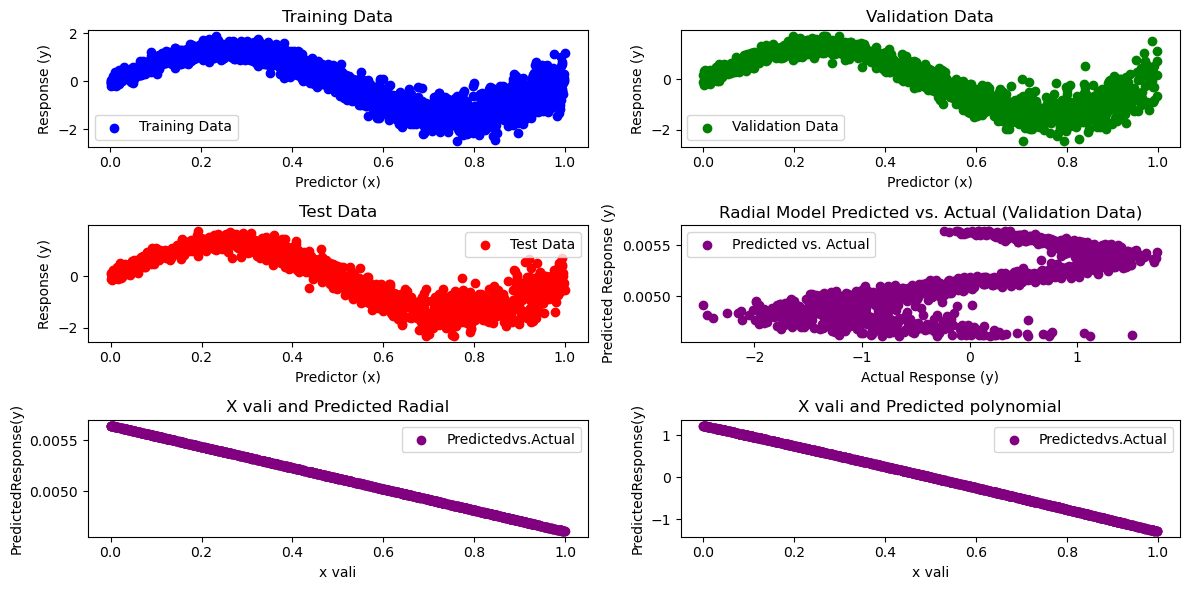

Best p for Polynomial in dataset-c.csv: 1
Best alpha for Radial in dataset-c.csv: 1000.0
Best gamma for Radial in dataset-c.csv: 0.001
Validation MSE for Radial Model in dataset-c.csv: 0.9954271103940205
Validation MSE for Polynomial Model in dataset-c.csv: 0.6881725686149779


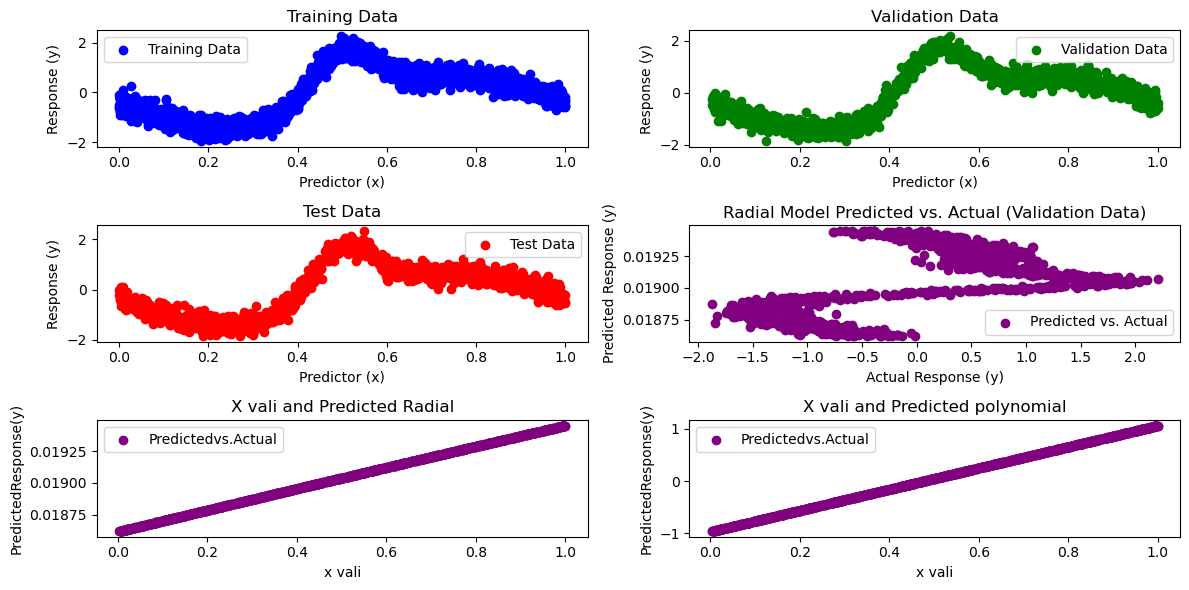

Best p for Polynomial in dataset-d.csv: 1
Best alpha for Radial in dataset-d.csv: 1000.0
Best gamma for Radial in dataset-d.csv: 0.001
Validation MSE for Radial Model in dataset-d.csv: 0.9936729428753129
Validation MSE for Polynomial Model in dataset-d.csv: 0.2653961509077539


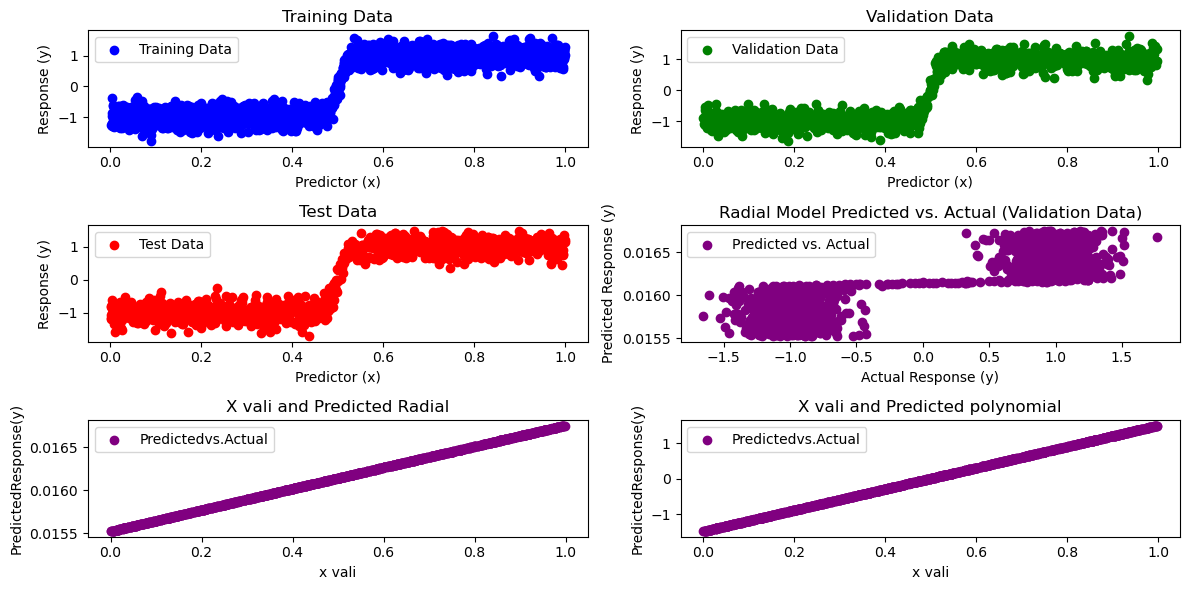

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt

# ระบุชื่อไฟล์ .csv ของชุดข้อมูล 
file_paths = ['dataset-a.csv', 'dataset-b.csv', 'dataset-c.csv', 'dataset-d.csv']

for file_path in file_paths:
    # โหลดข้อมูลจากไฟล์ .csv
    data = pd.read_csv(file_path)

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    X = data[['x']].values
    y = data['y'].values

    # แบ่งชุดข้อมูลเป็นชุดการฝึก, ชุดการตรวจสอบ, และชุดทดสอบ
    x_tv, x_test, y_tv, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
    x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size=1/3, random_state=1)

    # สร้างท่อการประมวลผลที่รวม PolynomialFeatures และ LinearRegression
    poly_reg = PolynomialFeatures()
    poly_model = LinearRegression()
    poly_pipeline = Pipeline([("polynomial_features", poly_reg), ("linear_regression", poly_model)])

    # กำหนดช่วงของ p ที่ต้องการทดสอบ
    param_grid_poly = {'polynomial_features__degree': list(range(1, 11))}

    # ใช้ GridSearchCV เพื่อค้นหาค่า p ที่เหมาะสม
    grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_poly.fit(x_train, y_train)
    # แสดงค่า p ที่ดีที่สุด
    print(f"Best p for Polynomial in {file_path}:", grid_search_poly.best_params_['polynomial_features__degree'])

    # กำหนดช่วงของ alpha และ gamma ที่ต้องการทดสอบ
    param_grid_radial = {'alpha': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}

    # สร้างโมเดล LBF ราเดียล
    radial_model = KernelRidge(kernel='rbf')

    # ใช้ GridSearchCV เพื่อค้นหาค่า alpha และ gamma ที่เหมาะสม
    grid_search_radial = GridSearchCV(radial_model, param_grid_radial, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search_radial.fit(x_train, y_train)

    # แสดงค่า alpha และ gamma ที่ดีที่สุด
    print(f"Best alpha for Radial in {file_path}:", grid_search_radial.best_params_['alpha'])
    print(f"Best gamma for Radial in {file_path}:", grid_search_radial.best_params_['gamma'])

    # สร้างโมเดล LBF โพลนอมิอล ด้วยค่า p ที่ดีที่สุด
    best_p_poly = grid_search_poly.best_params_['polynomial_features__degree']
    poly_reg = PolynomialFeatures(degree=best_p_poly)
    poly_X_train = poly_reg.fit_transform(x_train)
    poly_X_val = poly_reg.transform(x_vali)
    poly_model = LinearRegression()
    poly_model.fit(poly_X_train, y_train)
    
    # สร้างโมเดล LBF ราเดียล ด้วยค่า alpha และ gamma ที่ดีที่สุด
    best_alpha_radial = grid_search_radial.best_params_['alpha']
    best_gamma_radial = grid_search_radial.best_params_['gamma']
    radial_model = KernelRidge(kernel='rbf', alpha=best_alpha_radial, gamma=best_gamma_radial)
    radial_model.fit(x_train, y_train)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_radial = radial_model.predict(x_vali)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_radial = mean_squared_error(y_vali, y_val_pred_radial)
    print(f"Validation MSE for Radial Model in {file_path}:", mse_val_radial)

    # ทดสอบโมเดลบนชุดการตรวจสอบ
    y_val_pred_poly = poly_model.predict(poly_X_val)

    # คำนวณค่า MSE บนชุดการตรวจสอบ
    mse_val_poly = mean_squared_error(y_vali, y_val_pred_poly)
    print(f"Validation MSE for Polynomial Model in {file_path}:", mse_val_poly)

    # พล็อตกราฟการกระจายตัวของข้อมูล
    plt.figure(figsize=(12, 6))
    
    # กราฟ 1: Scatter Plot of Training Data
    plt.subplot(3, 2, 1)
    plt.scatter(x_train, y_train, label='Training Data', color='blue')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Training Data')
    
    # กราฟ 2: Scatter Plot of Validation Data
    plt.subplot(3, 2, 2)
    plt.scatter(x_vali, y_vali, label='Validation Data', color='green')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Validation Data')

    # กราฟ 3: Scatter Plot of Test Data
    plt.subplot(3, 2, 3)
    plt.scatter(x_test, y_test, label='Test Data', color='red')
    plt.xlabel('Predictor (x)')
    plt.ylabel('Response (y)')
    plt.legend()
    plt.title('Test Data')
    
    # กราฟ 4: Scatter Plot of Predicted vs. Actual for Radial Model
    plt.subplot(3, 2, 4)
    plt.scatter(y_vali, y_val_pred_radial, label='Predicted vs. Actual', color='purple')
    plt.xlabel('Actual Response (y)')
    plt.ylabel('Predicted Response (y)')
    plt.legend()
    plt.title('Radial Model Predicted vs. Actual (Validation Data)')
    
    plt.subplot(3, 2, 5)
    plt.scatter(x_vali,y_val_pred_radial,label='Predictedvs.Actual',color='purple') 
    plt.xlabel('x vali') 
    plt.ylabel('PredictedResponse(y)')
    plt.legend()
    plt.title('X vali and Predicted Radial')

    plt.subplot(3, 2, 6)
    plt.scatter(x_vali,y_val_pred_poly,label='Predictedvs.Actual',color='purple') 
    plt.xlabel('x vali') 
    plt.ylabel('PredictedResponse(y)')
    plt.legend()
    plt.title('X vali and Predicted polynomial')

    plt.tight_layout()
    plt.show()